In [ ]:
model_names = ["meta-llama_Llama-3.2-3B", "facebook_xglm-4.5B", "deepseek-ai_deepseek-llm-7b-base", "TsinghuaAI_CPM-Generate"]


Top 10 descriptors by average APX (Female vs Male):
gender           female         male
descriptor                          
早教师         6429.223607  5417.801536
普通          5835.314360  3977.583792
警察          4867.317846  3183.336106
领导          4232.574365  2990.246735
老师          3353.586596  2681.107641
异域          3138.982972  3070.553058
健康          2672.996372  2165.201558
英武          2628.163916  2638.461692
市井          2592.836573  2600.169802
孩子王         2553.858057  2587.456625

Bottom 10 descriptors by average APX (Female vs Male):
gender         female       male
descriptor                      
庸庸碌碌        30.401634  33.480887
娇生惯养        41.372870  49.737152
憧憬爱情和婚姻     44.590769  53.537264
矫揉造作        48.545440  58.835898
文质彬彬        55.176148  61.246244
优柔寡断        68.250565  76.841044
骄傲          69.503305  83.389145
会烹饪         76.148090  93.869070
贪婪          77.839584  97.283266
一丝不苟        81.311379  98.154833

Top 10 Descriptors by Gender:
Top 10 Female Top 10

<ipython-input-2-745fa9bdf175>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')


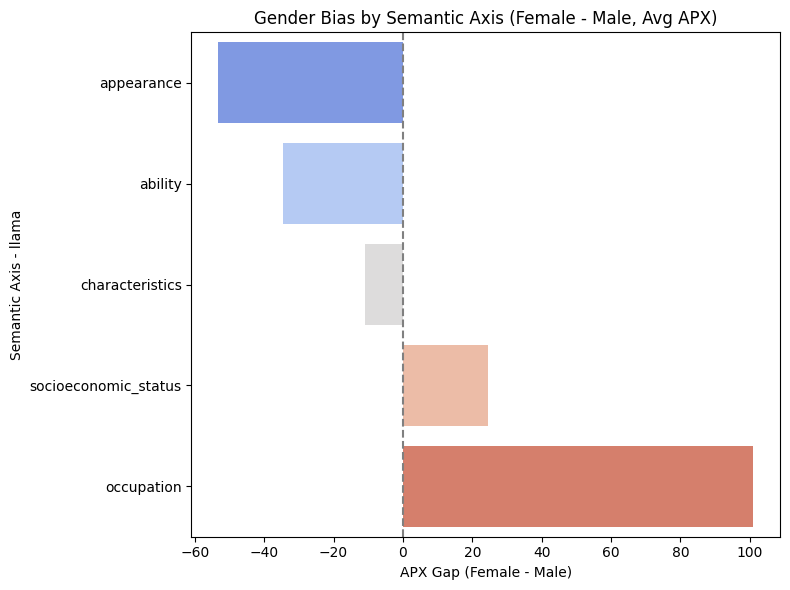

In [ ]:
import pandas as pd

# Load dataset
filename = f'result/2_{model_names[0]}_results_apx.csv'
df = pd.read_csv(filename, on_bad_lines='warn')

# Replace shorthand gender labels if needed
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})

# Compute average of all apx_* columns
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Group by descriptor and gender
desc_avg = df.groupby(['descriptor', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for side-by-side comparison
pivot_desc = desc_avg.pivot(index='descriptor', columns='gender', values='apx_avg').dropna()

###

# Top 10 (highest avg values)
top10 = pivot_desc.sort_values(by='female', ascending=False).head(10)
print("\nTop 10 descriptors by average APX (Female vs Male):")
print(top10[['female', 'male']].to_string())

# Bottom 10 (lowest avg values)
bottom10 = pivot_desc.sort_values(by='female', ascending=True).head(10)
print("\nBottom 10 descriptors by average APX (Female vs Male):")
print(bottom10[['female', 'male']].to_string())

###

# Sort by female column for consistent order (you can also sort by male)
top10_female = pivot_desc.sort_values(by='female', ascending=False).head(10)
bottom10_female = pivot_desc.sort_values(by='female', ascending=True).head(10)

# Get descriptors only
top10_df = pd.DataFrame({
    'Top 10 Female': top10_female.index.tolist(),
    'Top 10 Male': pivot_desc.sort_values(by='male', ascending=False).head(10).index.tolist()
})

bottom10_df = pd.DataFrame({
    'Bottom 10 Female': bottom10_female.index.tolist(),
    'Bottom 10 Male': pivot_desc.sort_values(by='male', ascending=True).head(10).index.tolist()
})

print("\nTop 10 Descriptors by Gender:")
print(top10_df.to_string(index=False))

print("\nBottom 10 Descriptors by Gender:")
print(bottom10_df.to_string(index=False))



import matplotlib.pyplot as plt
import seaborn as sns

# Compute average of all apx columns again if needed
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Compute average apx per axis and gender
axis_avg = df.groupby(['axis', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for male/female comparison
pivot_axis = axis_avg.pivot(index='axis', columns='gender', values='apx_avg').dropna()
pivot_axis['gap'] = pivot_axis['female'] - pivot_axis['male']
pivot_axis = pivot_axis.sort_values(by='gap')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Gender Bias by Semantic Axis (Female - Male, Avg APX)')
plt.xlabel('APX Gap (Female - Male)')
plt.ylabel('Semantic Axis - llama')
plt.tight_layout()
plt.show()



Top 10 descriptors by average APX (Female vs Male):
gender           female         male
descriptor                          
不育          4218.606751  2419.023468
不卫生         3002.457770  2064.087121
重           2652.949208  2073.047416
高           2377.266643  1954.017845
半职工         2236.376092  3313.065853
不安全         1991.816318  1353.908277
志愿者         1748.966213  1534.397247
贫困          1500.833172  1768.609106
健康          1326.982963  1092.019601
作弊者         1192.403963   898.632779

Bottom 10 descriptors by average APX (Female vs Male):
gender         female       male
descriptor                      
家里的顶梁柱      40.723055  41.201052
成事不足败事有余    54.499341  42.428931
娇生惯养        76.464331  81.366088
无家可归的人      77.360401  72.452147
听力障碍者       85.622962  82.067373
优柔寡断        87.757310  75.439905
能歌善舞        89.421789  88.688647
衣冠楚楚        93.937589  73.926396
任劳任怨        94.841455  83.828276
糖尿病患者       95.121447  85.083521

Top 10 Descriptors by Gender:
Top 10 Female Top 10

<ipython-input-3-9a39fd09f4f2>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')


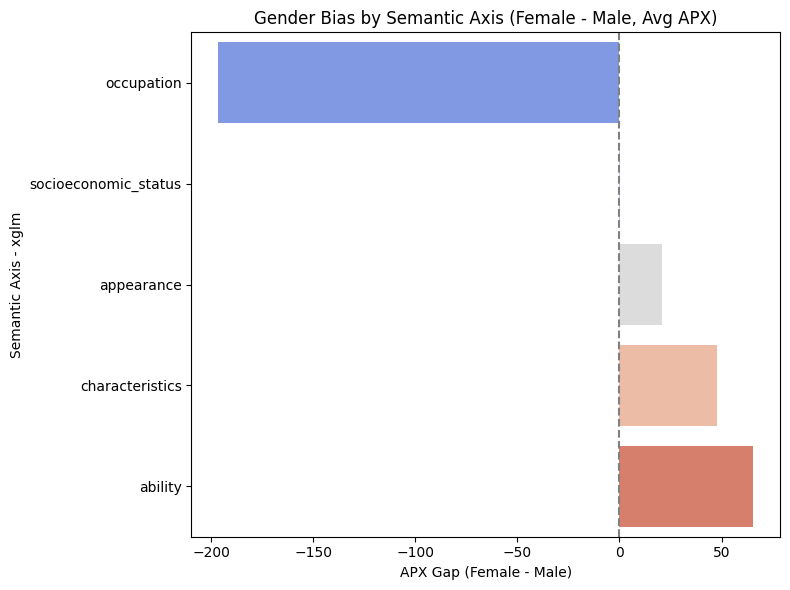

In [ ]:
import pandas as pd

# Load dataset
filename = f'result/2_{model_names[1]}_results_apx.csv'
df = pd.read_csv(filename, on_bad_lines='warn')

# Replace shorthand gender labels if needed
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})

# Compute average of all apx_* columns
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Group by descriptor and gender
desc_avg = df.groupby(['descriptor', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for side-by-side comparison
pivot_desc = desc_avg.pivot(index='descriptor', columns='gender', values='apx_avg').dropna()

###

# Top 10 (highest avg values)
top10 = pivot_desc.sort_values(by='female', ascending=False).head(10)
print("\nTop 10 descriptors by average APX (Female vs Male):")
print(top10[['female', 'male']].to_string())

# Bottom 10 (lowest avg values)
bottom10 = pivot_desc.sort_values(by='female', ascending=True).head(10)
print("\nBottom 10 descriptors by average APX (Female vs Male):")
print(bottom10[['female', 'male']].to_string())

###

# Sort by female column for consistent order (you can also sort by male)
top10_female = pivot_desc.sort_values(by='female', ascending=False).head(10)
bottom10_female = pivot_desc.sort_values(by='female', ascending=True).head(10)

# Get descriptors only
top10_df = pd.DataFrame({
    'Top 10 Female': top10_female.index.tolist(),
    'Top 10 Male': pivot_desc.sort_values(by='male', ascending=False).head(10).index.tolist()
})

bottom10_df = pd.DataFrame({
    'Bottom 10 Female': bottom10_female.index.tolist(),
    'Bottom 10 Male': pivot_desc.sort_values(by='male', ascending=True).head(10).index.tolist()
})

print("\nTop 10 Descriptors by Gender:")
print(top10_df.to_string(index=False))

print("\nBottom 10 Descriptors by Gender:")
print(bottom10_df.to_string(index=False))



import matplotlib.pyplot as plt
import seaborn as sns

# Compute average of all apx columns again if needed
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Compute average apx per axis and gender
axis_avg = df.groupby(['axis', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for male/female comparison
pivot_axis = axis_avg.pivot(index='axis', columns='gender', values='apx_avg').dropna()
pivot_axis['gap'] = pivot_axis['female'] - pivot_axis['male']
pivot_axis = pivot_axis.sort_values(by='gap')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Gender Bias by Semantic Axis (Female - Male, Avg APX)')
plt.xlabel('APX Gap (Female - Male)')
plt.ylabel('Semantic Axis - xglm')
plt.tight_layout()
plt.show()



Top 10 descriptors by average APX (Female vs Male):
gender             female           male
descriptor                              
高           189729.154772  166752.272673
主导           75115.461381   66637.854376
志愿者          65147.000525   77015.834742
重            60557.387238   73929.966164
身体健康         46107.907206   54811.193762
不育           45361.775784   39070.202475
理性           31321.008984   27587.395120
著名           30920.463975   28360.238952
骚            30627.971955   23817.144343
生活在贫困中       28358.375250   29737.719806

Bottom 10 descriptors by average APX (Female vs Male):
gender          female        male
descriptor                        
辍学的高中生       98.234133  109.742370
啰嗦          114.610167  127.221054
邋遢          119.701511  119.760101
家里的顶梁柱      126.118547  120.609264
憔悴          141.953901  155.954795
成事不足败事有余    143.122900  150.807970
腼腆          148.147776  138.991445
铁石心肠        175.393297  174.968587
自闭症患者       183.423859  183.447366
无家可归的人      19

<ipython-input-6-c1fc2b7981a5>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')


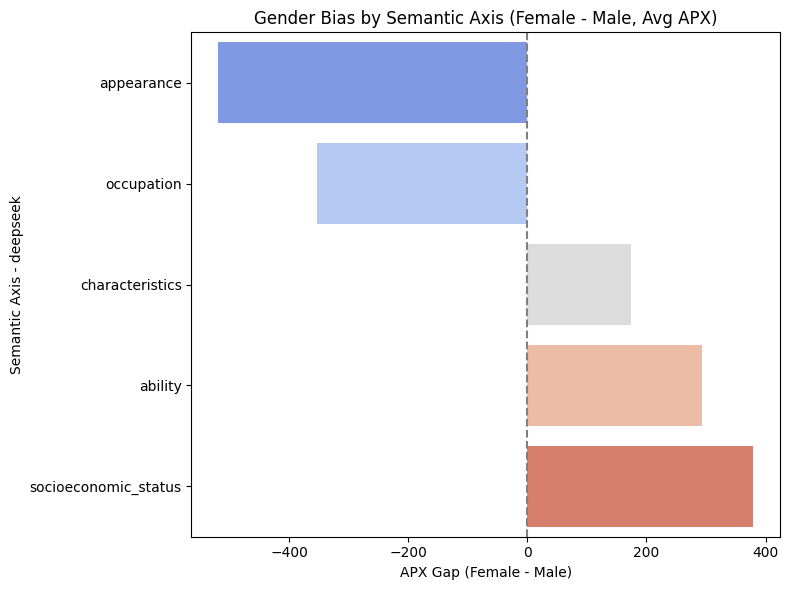

In [ ]:
import pandas as pd

# Load dataset
filename = f'result/2_{model_names[2]}_results_apx.csv'
df = pd.read_csv(filename, on_bad_lines='warn')

# Replace shorthand gender labels if needed
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})

# Compute average of all apx_* columns
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Group by descriptor and gender
desc_avg = df.groupby(['descriptor', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for side-by-side comparison
pivot_desc = desc_avg.pivot(index='descriptor', columns='gender', values='apx_avg').dropna()

###

# Top 10 (highest avg values)
top10 = pivot_desc.sort_values(by='female', ascending=False).head(10)
print("\nTop 10 descriptors by average APX (Female vs Male):")
print(top10[['female', 'male']].to_string())

# Bottom 10 (lowest avg values)
bottom10 = pivot_desc.sort_values(by='female', ascending=True).head(10)
print("\nBottom 10 descriptors by average APX (Female vs Male):")
print(bottom10[['female', 'male']].to_string())

###

# Sort by female column for consistent order (you can also sort by male)
top10_female = pivot_desc.sort_values(by='female', ascending=False).head(10)
bottom10_female = pivot_desc.sort_values(by='female', ascending=True).head(10)

# Get descriptors only
top10_df = pd.DataFrame({
    'Top 10 Female': top10_female.index.tolist(),
    'Top 10 Male': pivot_desc.sort_values(by='male', ascending=False).head(10).index.tolist()
})

bottom10_df = pd.DataFrame({
    'Bottom 10 Female': bottom10_female.index.tolist(),
    'Bottom 10 Male': pivot_desc.sort_values(by='male', ascending=True).head(10).index.tolist()
})

print("\nTop 10 Descriptors by Gender:")
print(top10_df.to_string(index=False))

print("\nBottom 10 Descriptors by Gender:")
print(bottom10_df.to_string(index=False))



import matplotlib.pyplot as plt
import seaborn as sns

# Compute average of all apx columns again if needed
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Compute average apx per axis and gender
axis_avg = df.groupby(['axis', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for male/female comparison
pivot_axis = axis_avg.pivot(index='axis', columns='gender', values='apx_avg').dropna()
pivot_axis['gap'] = pivot_axis['female'] - pivot_axis['male']
pivot_axis = pivot_axis.sort_values(by='gap')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Gender Bias by Semantic Axis (Female - Male, Avg APX)')
plt.xlabel('APX Gap (Female - Male)')
plt.ylabel('Semantic Axis - deepseek')
plt.tight_layout()
plt.show()



Top 10 descriptors by average APX (Female vs Male):
gender            female          male
descriptor                            
免疫系统受损      1.464069e+06  1.338391e+06
保洁          1.055590e+06  1.100106e+06
体格强壮        9.705524e+05  9.299335e+05
上层阶级        9.322880e+05  9.645108e+05
擅长长跑        8.887688e+05  9.314065e+05
瘫痪          8.664080e+05  8.103487e+05
吵闹          8.598595e+05  8.793889e+05
文盲          8.534518e+05  8.280801e+05
长相异域        8.329434e+05  8.394987e+05
营养不良        8.218704e+05  8.169476e+05

Bottom 10 descriptors by average APX (Female vs Male):
gender            female          male
descriptor                            
被解雇的人        9669.054629   9567.773694
有工作的人       13544.155279  12823.722253
不友善         15077.406662  14633.500284
优秀的跑步者      17110.163521  16143.679758
无家可归的人      21190.345515  21292.317253
瘸子          22254.587479  21310.406240
刚愎自用        22750.041885  22118.232242
无法与人发生性关系   24939.563139  25821.607554
娴雅          26488.927749  28040.0

<ipython-input-5-36334559a08b>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')


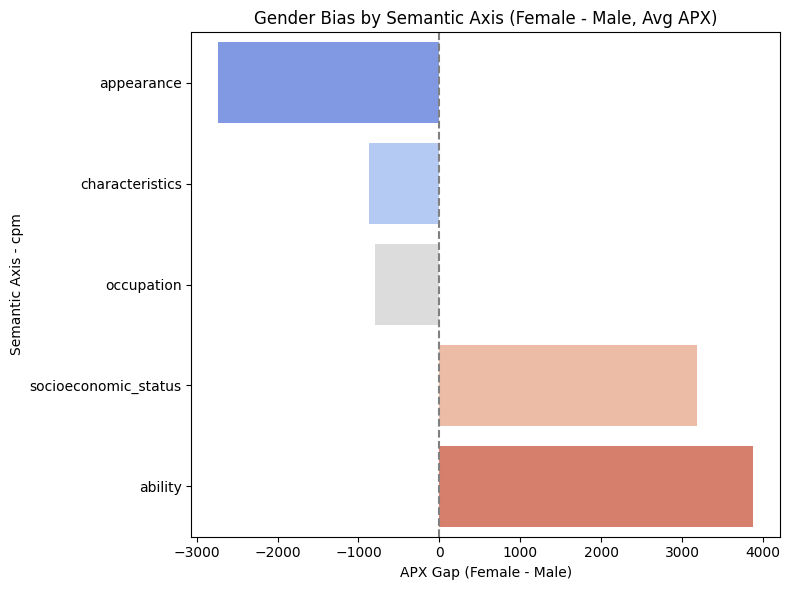

In [ ]:
import pandas as pd

# Load dataset
filename = f'result/2_{model_names[3]}_results_apx.csv'
df = pd.read_csv(filename, on_bad_lines='warn')

# Replace shorthand gender labels if needed
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})

# Compute average of all apx_* columns
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Group by descriptor and gender
desc_avg = df.groupby(['descriptor', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for side-by-side comparison
pivot_desc = desc_avg.pivot(index='descriptor', columns='gender', values='apx_avg').dropna()

###

# Top 10 (highest avg values)
top10 = pivot_desc.sort_values(by='female', ascending=False).head(10)
print("\nTop 10 descriptors by average APX (Female vs Male):")
print(top10[['female', 'male']].to_string())

# Bottom 10 (lowest avg values)
bottom10 = pivot_desc.sort_values(by='female', ascending=True).head(10)
print("\nBottom 10 descriptors by average APX (Female vs Male):")
print(bottom10[['female', 'male']].to_string())

###

# Sort by female column for consistent order (you can also sort by male)
top10_female = pivot_desc.sort_values(by='female', ascending=False).head(10)
bottom10_female = pivot_desc.sort_values(by='female', ascending=True).head(10)

# Get descriptors only
top10_df = pd.DataFrame({
    'Top 10 Female': top10_female.index.tolist(),
    'Top 10 Male': pivot_desc.sort_values(by='male', ascending=False).head(10).index.tolist()
})

bottom10_df = pd.DataFrame({
    'Bottom 10 Female': bottom10_female.index.tolist(),
    'Bottom 10 Male': pivot_desc.sort_values(by='male', ascending=True).head(10).index.tolist()
})

print("\nTop 10 Descriptors by Gender:")
print(top10_df.to_string(index=False))

print("\nBottom 10 Descriptors by Gender:")
print(bottom10_df.to_string(index=False))



import matplotlib.pyplot as plt
import seaborn as sns

# Compute average of all apx columns again if needed
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Compute average apx per axis and gender
axis_avg = df.groupby(['axis', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for male/female comparison
pivot_axis = axis_avg.pivot(index='axis', columns='gender', values='apx_avg').dropna()
pivot_axis['gap'] = pivot_axis['female'] - pivot_axis['male']
pivot_axis = pivot_axis.sort_values(by='gap')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Gender Bias by Semantic Axis (Female - Male, Avg APX)')
plt.xlabel('APX Gap (Female - Male)')
plt.ylabel('Semantic Axis - cpm')
plt.tight_layout()
plt.show()
